# EDA
Se realizara el analisis exploratorio de los datos


In [2]:
# Librerias a usar
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [3]:
# Carga de los dataframes
df_Hechos = pd.read_parquet('Data\Hechos_Homicidios_ETL.parquert')
df_Victimas = pd.read_parquet('Data\Victimas_Homicidios_ETL.parquert')

In [114]:
# Vista previa del datframe
df_Hechos.head(5)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Momento_del_dia
0,2016-0001,1.0,1/1/2016,2016.0,1.0,1.0,4:00:00,4.0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8.0,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,Noche
1,2016-0002,1.0,1/2/2016,2016.0,1.0,2.0,1:15:00,1.0,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9.0,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,Noche
2,2016-0003,1.0,1/3/2016,2016.0,1.0,3.0,7:00:00,7.0,AV ENTRE RIOS 2034,AVENIDA,...,None,ENTRE RIOS AV. 2034,1.0,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,Dia
3,2016-0004,1.0,1/10/2016,2016.0,1.0,10.0,0:00:00,0.0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8.0,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD,Noche
4,2016-0005,1.0,1/21/2016,2016.0,1.0,21.0,5:20:00,5.0,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1.0,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,Noche


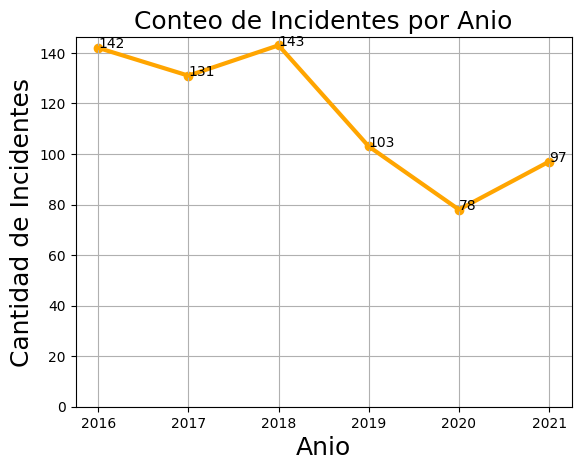

In [115]:

conteo_por_anio = df_Hechos['AAAA'].value_counts().sort_index()

plt.plot(conteo_por_anio.index, conteo_por_anio.values, color='orange', linewidth=3)
for i in range(len(conteo_por_anio)):
    plt.annotate(conteo_por_anio.values[i], (conteo_por_anio.index[i], conteo_por_anio.values[i]))
plt.scatter(conteo_por_anio.index, conteo_por_anio.values,color='orange')
plt.xlabel('Anio', fontsize=18)
plt.ylabel('Cantidad de Incidentes',fontsize=18)
plt.title('Conteo de Incidentes por Anio',fontsize=18)
plt.grid(True)
plt.ylim(0, None)
# Agregar etiquetas con los valores numéricos para cada barra
plt.show()

Esta grafica representa la cantidad de incidentes por anio donde podemos ver una tendencia a la baja a lo largo del tiempo

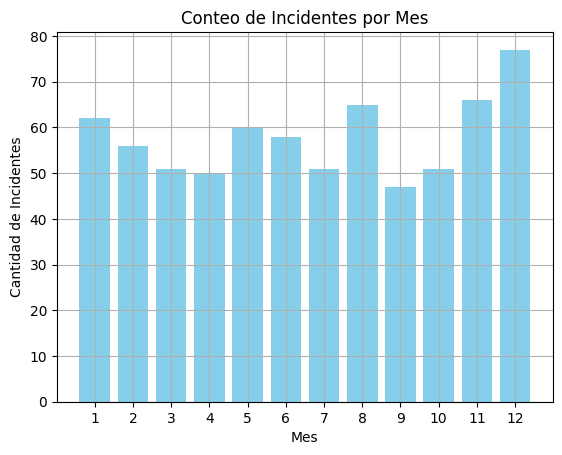

In [116]:
# Cantidad de incidentes por Mes

import matplotlib.pyplot as plt

conteo_por_mes = df_Hechos['MM'].value_counts().sort_index()

plt.bar(conteo_por_mes.index, conteo_por_mes.values, color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Incidentes')
plt.title('Conteo de Incidentes por Mes')
plt.xticks(conteo_por_mes.index)
plt.grid(True)
plt.show()


Esta grafica representa la cantidad de incidentes por mes donde podemos observar a el mes de diciembre es donde ocurren mas incidentes

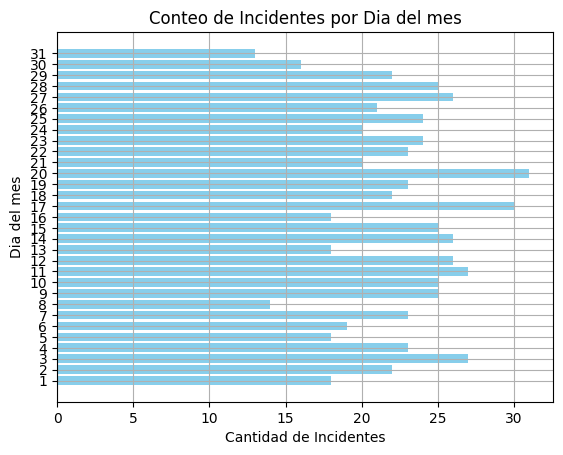

In [117]:
# Cantidad de incidentes por dia del mes

import matplotlib.pyplot as plt

conteo_por_dia = df_Hechos['DD'].value_counts().sort_index()

plt.barh(conteo_por_dia.index, conteo_por_dia.values, color='skyblue')
plt.ylabel('Dia del mes')
plt.xlabel('Cantidad de Incidentes')
plt.title('Conteo de Incidentes por Dia del mes')
plt.yticks(conteo_por_dia.index)
plt.grid(True)
plt.show()

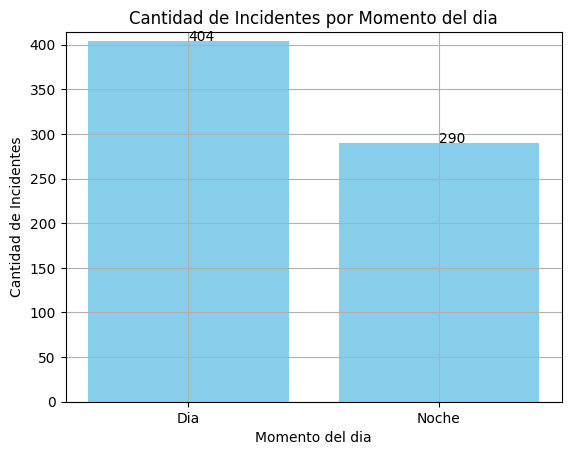

In [118]:
# Cantidad de incidentes por momento del dia
conteo_por_momento_del_dia = df_Hechos['Momento_del_dia'].value_counts()
plt.bar(conteo_por_momento_del_dia.index, conteo_por_momento_del_dia.values, color='skyblue')
plt.xlabel('Momento del dia')
plt.xticks(conteo_por_momento_del_dia.index)  # Establecer las etiquetas del eje x
for i in range(len(conteo_por_momento_del_dia)):
    plt.annotate(conteo_por_momento_del_dia.values[i], (conteo_por_momento_del_dia.index[i], conteo_por_momento_del_dia.values[i]))
plt.ylabel('Cantidad de Incidentes')
plt.ylim(0, conteo_por_momento_del_dia.max() + 10)
plt.title('Cantidad de Incidentes por Momento del dia')
plt.grid(True)
plt.show()

Esta grafica representa la cantidad de incidentes por momento del dia donde podemos observar a que ocurren mas incidentes durante el dia

In [119]:
df_Hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'Momento_del_dia'],
      dtype='object')

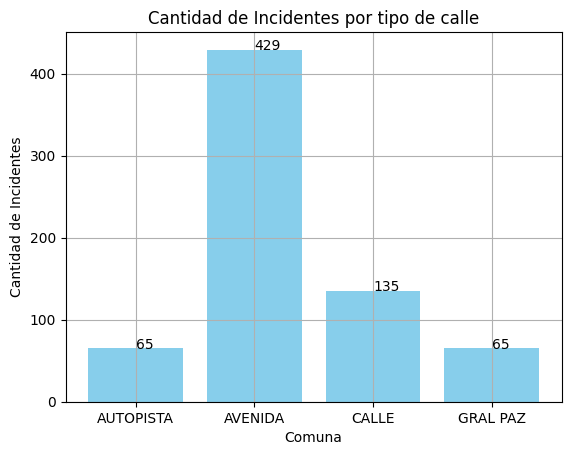

In [120]:
# Cantidad de incidentes por tipo de calle
conteo_por_TIPO_DE_CALLE = df_Hechos['TIPO_DE_CALLE'].value_counts().sort_index()

plt.bar(conteo_por_TIPO_DE_CALLE.index, conteo_por_TIPO_DE_CALLE.values, color='skyblue', linewidth=3)
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Incidentes')
for i in range(len(conteo_por_TIPO_DE_CALLE)):
    plt.annotate(conteo_por_TIPO_DE_CALLE.values[i], (conteo_por_TIPO_DE_CALLE.index[i], conteo_por_TIPO_DE_CALLE.values[i]))
plt.title('Cantidad de Incidentes por tipo de calle')
plt.xticks(conteo_por_TIPO_DE_CALLE.index)  # Establecer las etiquetas del eje x
plt.grid(True)
plt.show()

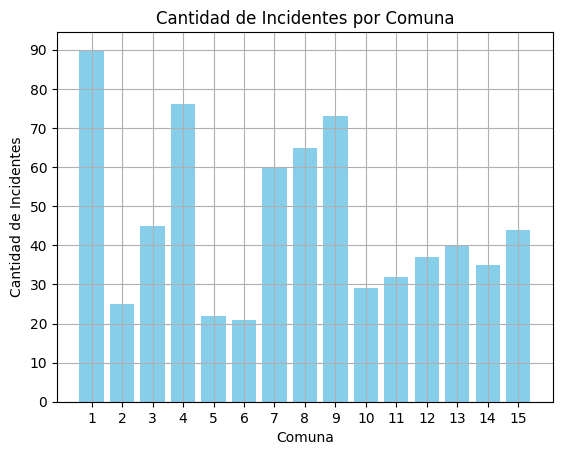

In [121]:
# Cantidad de incidentes por comuna

conteo_por_comuna = df_Hechos['COMUNA'].value_counts().sort_index()

plt.bar(conteo_por_comuna.index, conteo_por_comuna.values, color='skyblue', linewidth=3)
plt.yticks(np.arange(0, conteo_por_comuna.max() + 10, 10))
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Incidentes')
plt.title('Cantidad de Incidentes por Comuna')
plt.xticks(conteo_por_comuna.index)  # Establecer las etiquetas del eje x
plt.grid(True)
plt.show()


Esta grafica nos muestra la cantidad de incidentes por comunas

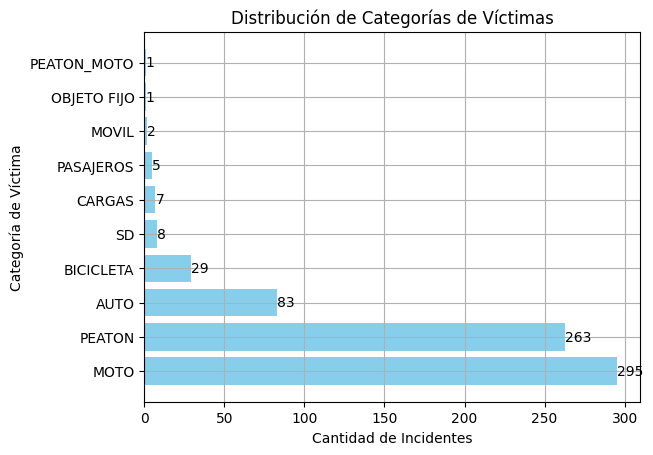

In [122]:
# Victimas dependiendo el transporte que usaban

conteo_victimas = df_Hechos['VICTIMA'].value_counts()

plt.barh(conteo_victimas.index, conteo_victimas.values, color='skyblue')
plt.xlabel('Cantidad de Incidentes')
plt.ylabel('Categoría de Víctima')
plt.title('Distribución de Categorías de Víctimas')
plt.grid(True)

# Agregar etiquetas con los valores numéricos para cada barra
for index, value in enumerate(conteo_victimas.values):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.show()



Como podemos observar hay una clara tendencia que dice que la mayoria de las victimas se encuentran en las categorias de moto y peaton

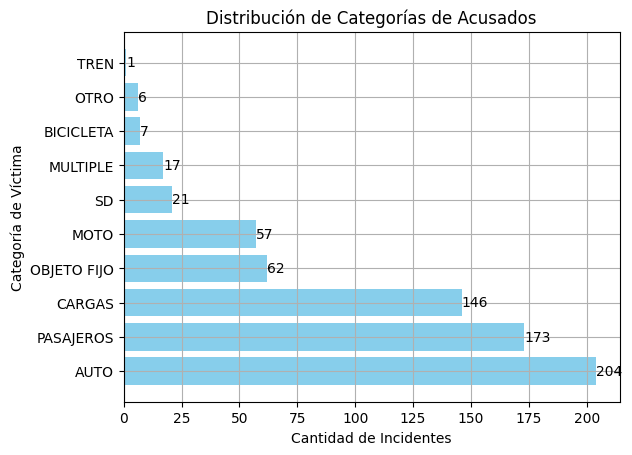

In [123]:
# Acusado dependiendo el transporte que usaban

conteo_acusado = df_Hechos['ACUSADO'].value_counts()

plt.barh(conteo_acusado.index, conteo_acusado.values, color='skyblue')
plt.xlabel('Cantidad de Incidentes')
plt.ylabel('Categoría de Víctima')
plt.title('Distribución de Categorías de Acusados')
plt.grid(True)

# Agregar etiquetas con los valores numéricos para cada barra
for index, value in enumerate(conteo_acusado.values):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.show()


Podemos observar que los vehiculos mas acusados son de las categorias auto, pasajeros y carga por lo que podemos concluir que los vehiculos grandes son los que mas intervienen

# Victimas

In [124]:
df_Victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,RangoEtario
0,2016-0001,1/1/2016,2016.0,1.0,1.0,CONDUCTOR,MOTO,MASCULINO,19.0,1/1/2016,19-30
1,2016-0002,1/2/2016,2016.0,1.0,2.0,CONDUCTOR,AUTO,MASCULINO,70.0,1/2/2016,51+
2,2016-0003,1/3/2016,2016.0,1.0,3.0,CONDUCTOR,MOTO,MASCULINO,30.0,1/3/2016,31-50
3,2016-0004,1/10/2016,2016.0,1.0,10.0,CONDUCTOR,MOTO,MASCULINO,18.0,SD,19-30
4,2016-0005,1/21/2016,2016.0,1.0,21.0,CONDUCTOR,MOTO,MASCULINO,29.0,2/1/2016,19-30
...,...,...,...,...,...,...,...,...,...,...,...
711,2021-0092,12/12/2021,2021.0,12.0,12.0,PEATON,PEATON,FEMENINO,50.0,12/12/2021,51+
712,2021-0093,12/13/2021,2021.0,12.0,13.0,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18.0,12/18/2021,19-30
713,2021-0094,12/20/2021,2021.0,12.0,20.0,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43.0,12/20/2021,31-50
714,2021-0095,12/30/2021,2021.0,12.0,30.0,CONDUCTOR,MOTO,MASCULINO,27.0,1/2/2022,19-30


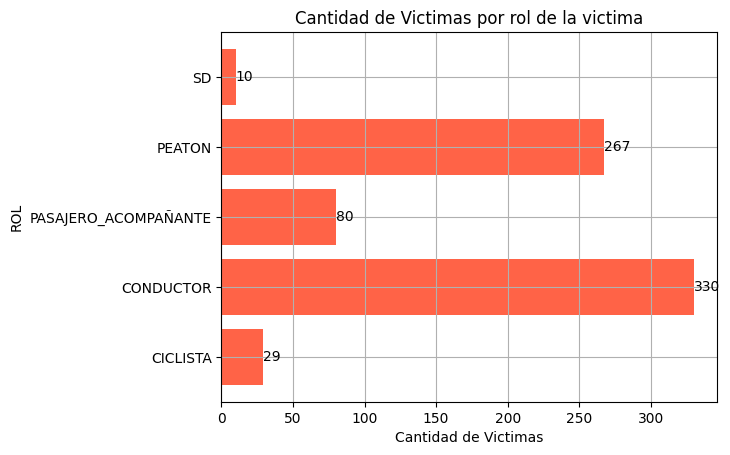

In [125]:
# Cantidad de incidentes por rol de la victima

conteo_por_rol = df_Victimas['ROL'].value_counts().sort_index()

plt.barh(conteo_por_rol.index, conteo_por_rol.values, color = 'tomato')
plt.ylabel('ROL')
plt.xlabel('Cantidad de Victimas')
plt.title('Cantidad de Victimas por rol de la victima')
plt.grid(True)
# Agregar etiquetas con los valores numéricos para cada barra
for index, value in enumerate(conteo_por_rol.values):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)
plt.show()

Esta grafica representa la cantidad de incidentes por rol de la victima donde podemos observar que los mas repetidos son el conductor y el peaton

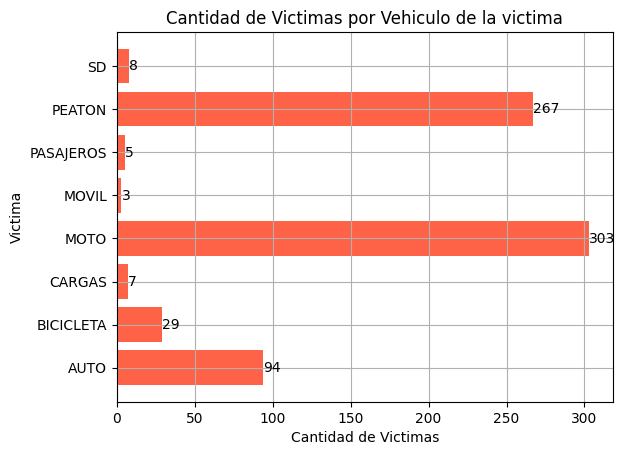

In [126]:
# Cantidad de incidentes por Victima 

conteo_por_Victima = df_Victimas['VICTIMA'].value_counts().sort_index()

plt.barh(conteo_por_Victima.index, conteo_por_Victima.values, color='tomato')
plt.ylabel('Victima')
plt.xlabel('Cantidad de Victimas')
plt.title('Cantidad de Victimas por Vehiculo de la victima')
plt.grid(True)
# Agregar etiquetas con los valores numéricos para cada barra
for index, value in enumerate(conteo_por_Victima.values):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)
plt.show()

Esta grafica representa la cantidad de incidentes por  el vehiculo que ocupaba la victima donde vemos unos valores altos en las motos y los peatones

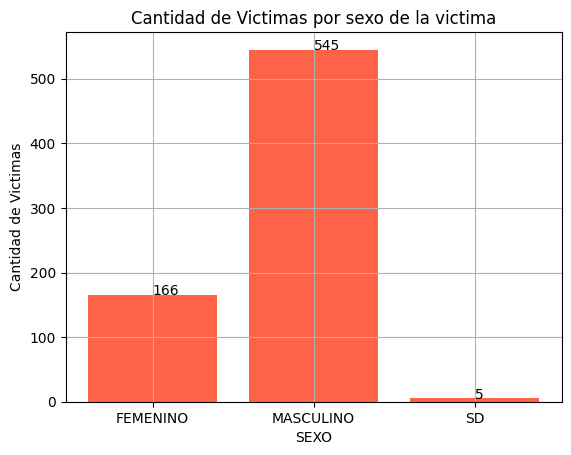

In [127]:
# Cantidad de incidentes por sexo de la victima

conteo_por_SEXO = df_Victimas['SEXO'].value_counts().sort_index()

plt.bar(conteo_por_SEXO.index, conteo_por_SEXO.values, color='tomato')
plt.xlabel('SEXO')
plt.ylabel('Cantidad de Victimas')
for i in range(len(conteo_por_SEXO)):
    plt.annotate(conteo_por_SEXO.values[i], (conteo_por_SEXO.index[i], conteo_por_SEXO.values[i]))
plt.title('Cantidad de Victimas por sexo de la victima')
plt.xticks(conteo_por_SEXO.index)  # Establecer las etiquetas del eje x
plt.grid(True)
plt.show()

Esta grafica representa la cantidad de victimas por el sexo donde se observa al sexo masculino con la mayor cifra de victimas 

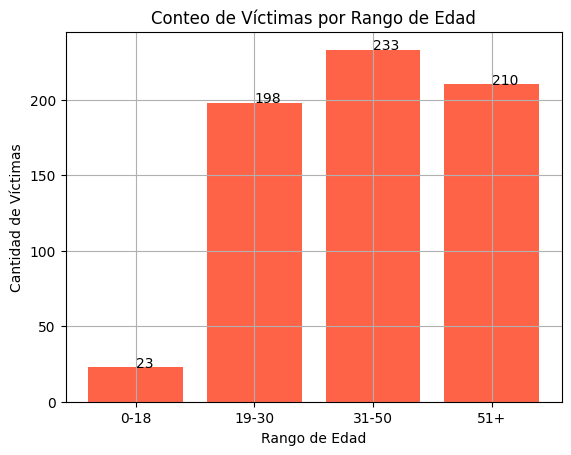

In [128]:
# Realizar el conteo de víctimas en cada rango de edad
conteo_por_edad = df_Victimas['RangoEtario'].value_counts().sort_index()

# Crear el gráfico de barras
plt.bar(conteo_por_edad.index.astype(str), conteo_por_edad.values, color='tomato')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Víctimas')
for i in range(len(conteo_por_edad)):
    plt.annotate(conteo_por_edad.values[i], (conteo_por_edad.index[i], conteo_por_edad.values[i]))
plt.title('Conteo de Víctimas por Rango de Edad')
plt.grid(True)

plt.show()

Esta grafica representa la cantidad de victimas por el rango etario donde vemos que los menores de edad son los menos involucrados en los incidentes

## Mapa de los Incidentes

In [162]:
import folium
import geopandas as gpd
import requests

# URL for the GeoJSON file containing Buenos Aires "comunas"
comunas_geojson_url = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/comunas/comunas.geojson"

# Download GeoJSON data using requests
response = requests.get(comunas_geojson_url)
comunas_geojson_data = response.json()

# Create a GeoDataFrame from GeoJSON data and set the CRS
comunas_gdf = gpd.GeoDataFrame.from_features(comunas_geojson_data['features'], crs="EPSG:4326")

# Create a folium map centered around Buenos Aires
map_buenos_aires = folium.Map(location=[-34.61, -58.38], zoom_start=12)

# Add GeoJSON data for "comunas" to the map
folium.GeoJson(comunas_gdf).add_to(map_buenos_aires)

# Add markers for each data point in the DataFrame
for index, row in df_Hechos.iterrows():
    folium.Marker([row['pos y'], row['pos x']]).add_to(map_buenos_aires)

# Save the map as an image (PNG)
map_buenos_aires.save("buenos_aires_map_with_comunas.html")
map_buenos_aires.save("buenos_aires_map_with_comunas.png")



In [163]:
map_buenos_aires